# Try out different dimension reduction methods
1. LEM(Lapacian Eigenmaps)
2. PCA

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.classification.kernel_based import RocketClassifier

from datasets import Dataset
from param import *

datalist = ParamDir().data_path_list

data_dir = datalist[2] # a wild-type mouse
dataset = Dataset(data_dir, 1.0, False)

(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)

## 1. Dimension Reduction

In [19]:
from sklearn.manifold import SpectralEmbedding

data_len = len(X_train)
embedding1 = SpectralEmbedding(n_components=11, n_neighbors=int(data_len*.0025))
X_transformed = embedding1.fit_transform(X_train)
X_transformed = X_transformed[:, 1:11]  
embedding2 = SpectralEmbedding(n_components=4, n_neighbors=int(data_len*.075))
X_transformed = embedding2.fit_transform(X_transformed)

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 0, 'comp 3')

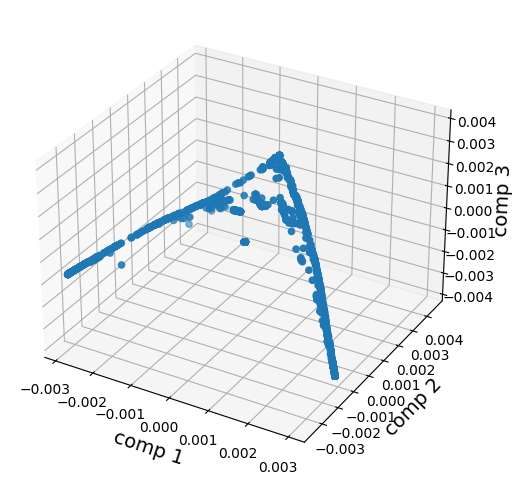

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
xx = X_transformed[:,1]
yy = X_transformed[:,2]
zz = X_transformed[:,3]
ax.scatter(xx, yy, zz)

ax.set_xlabel("comp 1", size = 14)
ax.set_ylabel("comp 2", size = 14)
ax.set_zlabel("comp 3", size = 14)

In [ ]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression(
                multi_class='multinomial', 
                solver='newton-cg',
                ) 

## 2. K means clusters

In [34]:
from sklearn.cluster import KMeans

X_clusters = kmeans = KMeans(n_clusters=4).fit_predict(X_transformed)


In [27]:
X_transformed.shape

(1943, 4)

In [33]:
X_cluster

(1943,)

## 3. Segment Time Series